# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
#print (xs['f'], xs.f, xs.h, '\n')
#print (xs[['d', 'f', 'h']], '\n')
#print (type(xs[['d', 'f', 'h']]), '\n')

d = {"a": 1, "b": 2, "c": 3, "d": 4}
ds = pd.Series(data=d, index=["a", "b", "c", "d"])
print(ds)

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

a    1
b    2
c    3
d    4
dtype: int64


In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
print(pd.Series(data=d))
print(pd.Series(data=d, index=["d", "e", "f"]))
print(pd.Series(data=d, index=["a", "b", "c"]))



b         1
a       cat
c    [2, 3]
dtype: object
d    NaN
e    NaN
f    NaN
dtype: object
a       cat
b         1
c    [2, 3]
dtype: object


A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1] #b is summed with b (bx2), c with c and d with d
print(s)

a    0.844080
b   -1.478783
c   -0.329850
d   -0.306746
e   -0.059780
dtype: float64
a         NaN
b   -2.957565
c   -0.659699
d   -0.613492
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2022,11,30,10,45,10,15) #15 is in microseconds
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 30 2022'
print(date)
# or alternatively
date = '30/11/2022 10:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)

pd.date_range(start="Nov 30 2022", end="Jan 5 2023")


2022-12-01
2022-11-30 10:45:10.000015
Nov 30 2022
30/11/2022 10:45:00
DatetimeIndex(['2022-11-30 10:45:00', '2022-12-01 10:45:00',
               '2022-12-02 10:45:00', '2022-12-03 10:45:00',
               '2022-12-04 10:45:00', '2022-12-05 10:45:00',
               '2022-12-06 10:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2022-11-30 10:45:00', '2022-11-30 10:45:01',
               '2022-11-30 10:45:02', '2022-11-30 10:45:03',
               '2022-11-30 10:45:04', '2022-11-30 10:45:05',
               '2022-11-30 10:45:06', '2022-11-30 10:45:07',
               '2022-11-30 10:45:08', '2022-11-30 10:45:09',
               ...
               '2022-11-30 11:44:50', '2022-11-30 11:44:51',
               '2022-11-30 11:44:52', '2022-11-30 11:44:53',
               '2022-11-30 11:44:54', '2022-11-30 11:44:55',
               '2022-11-30 11:44:56', '2022-11-30 11:44:57',
               '2022-11-30 11:44:58', '2022-11-30 11:44:59'],
              dtype='datetime6

DatetimeIndex(['2022-11-30', '2022-12-01', '2022-12-02', '2022-12-03',
               '2022-12-04', '2022-12-05', '2022-12-06', '2022-12-07',
               '2022-12-08', '2022-12-09', '2022-12-10', '2022-12-11',
               '2022-12-12', '2022-12-13', '2022-12-14', '2022-12-15',
               '2022-12-16', '2022-12-17', '2022-12-18', '2022-12-19',
               '2022-12-20', '2022-12-21', '2022-12-22', '2022-12-23',
               '2022-12-24', '2022-12-25', '2022-12-26', '2022-12-27',
               '2022-12-28', '2022-12-29', '2022-12-30', '2022-12-31',
               '2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05'],
              dtype='datetime64[ns]', freq='D')

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [7]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))
print(tstamp)
print(tstamp.value)

# internally it counts the nanoseconds from January 1st 1970
tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



2020-11-09 00:00:00
1604880000000000000
1000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
print(tseries, "\n")
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2022-11-30':'2022-12-01'], '\n') # Note - includes end time


2022-11-30 10:45:00     9.178525
2022-12-01 10:45:00    10.638939
2022-12-02 10:45:00     9.722275
2022-12-03 10:45:00    10.369883
2022-12-04 10:45:00    10.288676
2022-12-05 10:45:00     9.979958
2022-12-06 10:45:00    10.479259
Freq: D, dtype: float64 

2022-11-30 10:45:00     9.178525
2022-12-01 10:45:00    10.638939
2022-12-02 10:45:00     9.722275
2022-12-03 10:45:00    10.369883
Freq: D, dtype: float64 

2022-11-30 10:45:00     9.178525
2022-12-01 10:45:00    10.638939
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [10]:
entries=10
entries*=2
dates=pd.date_range('30 Nov 2022 10:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,6), index=dates, columns=['A','B','C','D','E','F']) #number of generated columns and rows must be equal to the indexed columns or, in this case, the timestamped rows
#print(df)
df


,A,B,C,D,E,F
2022-11-30 10:45:00,1.438630,0.900946,1.316814,0.368872,-0.359222,0.638922
2022-11-30 11:45:00,-0.390329,0.137173,1.436132,0.219373,-0.956267,-1.173558
2022-11-30 12:45:00,0.307374,-0.263113,0.711974,0.336196,-0.143375,0.065013
2022-11-30 13:45:00,-0.352002,-0.822383,0.319852,1.798978,-0.613830,0.800714
2022-11-30 14:45:00,-1.693897,0.582719,-0.286391,0.030436,-0.172897,-1.000883
2022-11-30 15:45:00,1.323352,0.739203,-0.045952,-0.052429,1.165805,-0.751596
2022-11-30 16:45:00,-2.632991,2.630956,1.114847,0.013869,-0.276218,0.114330
2022-11-30 17:45:00,-0.611380,0.452826,0.675741,0.896777,0.154956,-1.300533
2022-11-30 18:45:00,0.821304,-1.236912,1.080280,0.003669,-1.540961,0.100257
2022-11-30 19:45:00,-0.208690,1.260868,-2.132295,0.373865,-0.888659,0.941292


or by means of a dictionary:


In [11]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(5),dtype='float32'),
      'D' : np.arange(7,12), #number of elements here must equal range of indexing in previous row of code (key C in dictionary)
      'E' : pd.Categorical(["test","train","test","train","ao"]), #also here
    }
    )
df2

# check what happens if D and E had different lengths 

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train
4,1.0,2013-01-02,1.0,11,ao


### Viewing Data

In [12]:
df.head(2) #first 2 rows of dataframe

,A,B,C,D,E,F
2022-11-30 10:45:00,1.438630,0.900946,1.316814,0.368872,-0.359222,0.638922
2022-11-30 11:45:00,-0.390329,0.137173,1.436132,0.219373,-0.956267,-1.173558


In [13]:
df.tail(4) #last 4 rows

,A,B,C,D,E,F
2022-12-01 02:45:00,0.874110,-0.034397,0.031006,-0.087679,2.159793,0.137073
2022-12-01 03:45:00,0.176309,1.225710,1.117978,-2.454419,-1.850960,-0.847367
2022-12-01 04:45:00,-2.107101,0.494478,0.278435,0.571950,-2.076990,-0.490488
2022-12-01 05:45:00,-0.205607,0.235780,0.915467,-0.929556,0.576837,-0.969734


In [14]:
print(df.index)
type(df.index)

DatetimeIndex(['2022-11-30 10:45:00', '2022-11-30 11:45:00',
               '2022-11-30 12:45:00', '2022-11-30 13:45:00',
               '2022-11-30 14:45:00', '2022-11-30 15:45:00',
               '2022-11-30 16:45:00', '2022-11-30 17:45:00',
               '2022-11-30 18:45:00', '2022-11-30 19:45:00',
               '2022-11-30 20:45:00', '2022-11-30 21:45:00',
               '2022-11-30 22:45:00', '2022-11-30 23:45:00',
               '2022-12-01 00:45:00', '2022-12-01 01:45:00',
               '2022-12-01 02:45:00', '2022-12-01 03:45:00',
               '2022-12-01 04:45:00', '2022-12-01 05:45:00'],
              dtype='datetime64[ns]', freq='H')


pandas.core.indexes.datetimes.DatetimeIndex

In [15]:
print(df.columns)
type(df.columns)

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')


pandas.core.indexes.base.Index

In [16]:
print(df.values) #numpy array
type(df.values)

[[ 1.43862958e+00  9.00945649e-01  1.31681434e+00  3.68872240e-01
  -3.59221660e-01  6.38922025e-01]
 [-3.90328569e-01  1.37172625e-01  1.43613181e+00  2.19373107e-01
  -9.56266862e-01 -1.17355818e+00]
 [ 3.07373698e-01 -2.63113235e-01  7.11974157e-01  3.36196290e-01
  -1.43375037e-01  6.50126409e-02]
 [-3.52001797e-01 -8.22382604e-01  3.19852202e-01  1.79897777e+00
  -6.13829837e-01  8.00714241e-01]
 [-1.69389680e+00  5.82718776e-01 -2.86390687e-01  3.04357828e-02
  -1.72896902e-01 -1.00088330e+00]
 [ 1.32335222e+00  7.39203163e-01 -4.59520884e-02 -5.24287522e-02
   1.16580504e+00 -7.51596150e-01]
 [-2.63299128e+00  2.63095590e+00  1.11484749e+00  1.38690866e-02
  -2.76217817e-01  1.14329529e-01]
 [-6.11380114e-01  4.52826303e-01  6.75740803e-01  8.96777171e-01
   1.54955843e-01 -1.30053254e+00]
 [ 8.21303531e-01 -1.23691159e+00  1.08028004e+00  3.66938693e-03
  -1.54096113e+00  1.00256789e-01]
 [-2.08690207e-01  1.26086756e+00 -2.13229498e+00  3.73864636e-01
  -8.88658604e-01  9.4129

numpy.ndarray

In [17]:
df.describe()

,A,B,C,D,E,F
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.345960,0.065003,0.435621,0.006984,-0.274282,-0.274678
std,1.246753,1.066475,0.872410,0.851440,0.992185,0.820160
min,-2.632991,-2.226440,-2.132295,-2.454419,-2.076990,-1.571220
25%,-1.267565,-0.753346,-0.075817,-0.129480,-0.905561,-0.877959
50%,-0.280346,0.109283,0.689989,0.008769,-0.158136,-0.515958
75%,0.464958,0.621840,1.115630,0.370120,0.081257,0.240240
max,1.655747,2.630956,1.436132,1.798978,2.159793,1.272996


In [18]:
df.T #transpose

,2022-11-30 10:45:00,2022-11-30 11:45:00,2022-11-30 12:45:00,2022-11-30 13:45:00,2022-11-30 14:45:00,2022-11-30 15:45:00,2022-11-30 16:45:00,2022-11-30 17:45:00,2022-11-30 18:45:00,2022-11-30 19:45:00,2022-11-30 20:45:00,2022-11-30 21:45:00,2022-11-30 22:45:00,2022-11-30 23:45:00,2022-12-01 00:45:00,2022-12-01 01:45:00,2022-12-01 02:45:00,2022-12-01 03:45:00,2022-12-01 04:45:00,2022-12-01 05:45:00
A,1.438630,-0.390329,0.307374,-0.352002,-1.693897,1.323352,-2.632991,-0.611380,0.821304,-0.208690,0.346176,-0.964751,-1.372813,1.655747,-1.232482,-2.090161,0.874110,0.176309,-2.107101,-0.205607
B,0.900946,0.137173,-0.263113,-0.822383,0.582719,0.739203,2.630956,0.452826,-1.236912,1.260868,-0.368785,-0.858211,-0.730334,-0.901408,0.081392,-2.226440,-0.034397,1.225710,0.494478,0.235780
C,1.316814,1.436132,0.711974,0.319852,-0.286391,-0.045952,1.114847,0.675741,1.080280,-2.132295,0.704238,1.255798,-0.539852,-0.165410,-0.365252,1.289004,0.031006,1.117978,0.278435,0.915467
D,0.368872,0.219373,0.336196,1.798978,0.030436,-0.052429,0.013869,0.896777,0.003669,0.373865,-0.254882,-0.943528,-0.000835,-0.559439,0.891867,-0.083407,-0.087679,-2.454419,0.571950,-0.929556
E,-0.359222,-0.956267,-0.143375,-0.613830,-0.172897,1.165805,-0.276218,0.154956,-1.540961,-0.888659,0.056691,-1.066911,0.036636,-0.103666,0.469370,-0.055769,2.159793,-1.850960,-2.076990,0.576837
F,0.638922,-1.173558,0.065013,0.800714,-1.000883,-0.751596,0.114330,-1.300533,0.100257,0.941292,-0.541429,-1.571220,-0.813962,1.272996,0.549742,-0.653136,0.137073,-0.847367,-0.490488,-0.969734


In [19]:
df.sort_index(axis=0,ascending=False) 

,A,B,C,D,E,F
2022-12-01 05:45:00,-0.205607,0.235780,0.915467,-0.929556,0.576837,-0.969734
2022-12-01 04:45:00,-2.107101,0.494478,0.278435,0.571950,-2.076990,-0.490488
2022-12-01 03:45:00,0.176309,1.225710,1.117978,-2.454419,-1.850960,-0.847367
2022-12-01 02:45:00,0.874110,-0.034397,0.031006,-0.087679,2.159793,0.137073
2022-12-01 01:45:00,-2.090161,-2.226440,1.289004,-0.083407,-0.055769,-0.653136
2022-12-01 00:45:00,-1.232482,0.081392,-0.365252,0.891867,0.469370,0.549742
2022-11-30 23:45:00,1.655747,-0.901408,-0.165410,-0.559439,-0.103666,1.272996
2022-11-30 22:45:00,-1.372813,-0.730334,-0.539852,-0.000835,0.036636,-0.813962
2022-11-30 21:45:00,-0.964751,-0.858211,1.255798,-0.943528,-1.066911,-1.571220
2022-11-30 20:45:00,0.346176,-0.368785,0.704238,-0.254882,0.056691,-0.541429


In [20]:
df.sort_values(by="C")

,A,B,C,D,E,F
2022-11-30 19:45:00,-0.208690,1.260868,-2.132295,0.373865,-0.888659,0.941292
2022-11-30 22:45:00,-1.372813,-0.730334,-0.539852,-0.000835,0.036636,-0.813962
2022-12-01 00:45:00,-1.232482,0.081392,-0.365252,0.891867,0.469370,0.549742
2022-11-30 14:45:00,-1.693897,0.582719,-0.286391,0.030436,-0.172897,-1.000883
2022-11-30 23:45:00,1.655747,-0.901408,-0.165410,-0.559439,-0.103666,1.272996
2022-11-30 15:45:00,1.323352,0.739203,-0.045952,-0.052429,1.165805,-0.751596
2022-12-01 02:45:00,0.874110,-0.034397,0.031006,-0.087679,2.159793,0.137073
2022-12-01 04:45:00,-2.107101,0.494478,0.278435,0.571950,-2.076990,-0.490488
2022-11-30 13:45:00,-0.352002,-0.822383,0.319852,1.798978,-0.613830,0.800714
2022-11-30 17:45:00,-0.611380,0.452826,0.675741,0.896777,0.154956,-1.300533


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [21]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..): i.e. if "A b" was the name of the column, syntax of ".A b" function fails
print (df.A)

2022-11-30 10:45:00    1.438630
2022-11-30 11:45:00   -0.390329
2022-11-30 12:45:00    0.307374
2022-11-30 13:45:00   -0.352002
2022-11-30 14:45:00   -1.693897
2022-11-30 15:45:00    1.323352
2022-11-30 16:45:00   -2.632991
2022-11-30 17:45:00   -0.611380
2022-11-30 18:45:00    0.821304
2022-11-30 19:45:00   -0.208690
2022-11-30 20:45:00    0.346176
2022-11-30 21:45:00   -0.964751
2022-11-30 22:45:00   -1.372813
2022-11-30 23:45:00    1.655747
2022-12-01 00:45:00   -1.232482
2022-12-01 01:45:00   -2.090161
2022-12-01 02:45:00    0.874110
2022-12-01 03:45:00    0.176309
2022-12-01 04:45:00   -2.107101
2022-12-01 05:45:00   -0.205607
Freq: H, Name: A, dtype: float64 

2022-11-30 10:45:00    1.438630
2022-11-30 11:45:00   -0.390329
2022-11-30 12:45:00    0.307374
2022-11-30 13:45:00   -0.352002
2022-11-30 14:45:00   -1.693897
2022-11-30 15:45:00    1.323352
2022-11-30 16:45:00   -2.632991
2022-11-30 17:45:00   -0.611380
2022-11-30 18:45:00    0.821304
2022-11-30 19:45:00   -0.208690
2022-

In [22]:
# selecting rows by counting
print(df[0:3])

# or by index
df["2022-11-30 10:45:00":"2022-11-30 12:45:00"]

                            A         B         C         D         E  \
2022-11-30 10:45:00  1.438630  0.900946  1.316814  0.368872 -0.359222   
2022-11-30 11:45:00 -0.390329  0.137173  1.436132  0.219373 -0.956267   
2022-11-30 12:45:00  0.307374 -0.263113  0.711974  0.336196 -0.143375   

                            F  
2022-11-30 10:45:00  0.638922  
2022-11-30 11:45:00 -1.173558  
2022-11-30 12:45:00  0.065013  


,A,B,C,D,E,F
2022-11-30 10:45:00,1.438630,0.900946,1.316814,0.368872,-0.359222,0.638922
2022-11-30 11:45:00,-0.390329,0.137173,1.436132,0.219373,-0.956267,-1.173558
2022-11-30 12:45:00,0.307374,-0.263113,0.711974,0.336196,-0.143375,0.065013


### Selection by label

In [23]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A    1.438630
B    0.900946
C    1.316814
D    0.368872
E   -0.359222
F    0.638922
Name: 2022-11-30 10:45:00, dtype: float64

In [24]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]
#print(a)

,A,B
2022-11-30 10:45:00,1.438630,0.900946
2022-11-30 11:45:00,-0.390329,0.137173
2022-11-30 12:45:00,0.307374,-0.263113
2022-11-30 13:45:00,-0.352002,-0.822383
2022-11-30 14:45:00,-1.693897,0.582719
2022-11-30 15:45:00,1.323352,0.739203
2022-11-30 16:45:00,-2.632991,2.630956
2022-11-30 17:45:00,-0.611380,0.452826
2022-11-30 18:45:00,0.821304,-1.236912
2022-11-30 19:45:00,-0.208690,1.260868


In [25]:
# showing label slicing, both endpoints are included:
df.loc['2022-11-30 14:45:00':'2022-11-30 16:45:00',['A','B']]

#There are data structures which we might want to view or for which we might want to create a copy

,A,B
2022-11-30 14:45:00,-1.693897,0.582719
2022-11-30 15:45:00,1.323352,0.739203
2022-11-30 16:45:00,-2.632991,2.630956


In [26]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-0.39032856946694466
-0.39032856946694466


### Selecting by position

In [27]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A   -0.352002
B   -0.822383
C    0.319852
D    1.798978
E   -0.613830
F    0.800714
Name: 2022-11-30 13:45:00, dtype: float64 

                            A         B
2022-11-30 13:45:00 -0.352002 -0.822383
2022-11-30 14:45:00 -1.693897  0.582719


In [28]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2022-11-30 11:45:00,-0.390329,1.436132
2022-11-30 12:45:00,0.307374,0.711974
2022-11-30 14:45:00,-1.693897,-0.286391


In [29]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D         E  \
2022-11-30 11:45:00 -0.390329  0.137173  1.436132  0.219373 -0.956267   
2022-11-30 12:45:00  0.307374 -0.263113  0.711974  0.336196 -0.143375   

                            F  
2022-11-30 11:45:00 -1.173558  
2022-11-30 12:45:00  0.065013   

                            B         C
2022-11-30 10:45:00  0.900946  1.316814
2022-11-30 11:45:00  0.137173  1.436132
2022-11-30 12:45:00 -0.263113  0.711974
2022-11-30 13:45:00 -0.822383  0.319852
2022-11-30 14:45:00  0.582719 -0.286391
2022-11-30 15:45:00  0.739203 -0.045952
2022-11-30 16:45:00  2.630956  1.114847
2022-11-30 17:45:00  0.452826  0.675741
2022-11-30 18:45:00 -1.236912  1.080280
2022-11-30 19:45:00  1.260868 -2.132295
2022-11-30 20:45:00 -0.368785  0.704238
2022-11-30 21:45:00 -0.858211  1.255798
2022-11-30 22:45:00 -0.730334 -0.539852
2022-11-30 23:45:00 -0.901408 -0.165410
2022-12-01 00:45:00  0.081392 -0.365252
2022-12-01 01:45:00 -2.226440  1.289004
20

In [30]:
# selecting an individual element by position
print(df.iloc[1,1])
df.iat[1,1]

#loc actual name of indexes must be provided, iloc you don't need name, but you have to count to the place you want to go


0.1371726252004801


0.1371726252004801

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [31]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D,E,F
2022-11-30 10:45:00,1.438630,0.900946,1.316814,0.368872,-0.359222,0.638922
2022-11-30 11:45:00,-0.390329,0.137173,1.436132,0.219373,-0.956267,-1.173558
2022-11-30 14:45:00,-1.693897,0.582719,-0.286391,0.030436,-0.172897,-1.000883
2022-11-30 15:45:00,1.323352,0.739203,-0.045952,-0.052429,1.165805,-0.751596
2022-11-30 16:45:00,-2.632991,2.630956,1.114847,0.013869,-0.276218,0.114330
2022-11-30 17:45:00,-0.611380,0.452826,0.675741,0.896777,0.154956,-1.300533
2022-11-30 19:45:00,-0.208690,1.260868,-2.132295,0.373865,-0.888659,0.941292
2022-12-01 00:45:00,-1.232482,0.081392,-0.365252,0.891867,0.469370,0.549742
2022-12-01 03:45:00,0.176309,1.225710,1.117978,-2.454419,-1.850960,-0.847367
2022-12-01 04:45:00,-2.107101,0.494478,0.278435,0.571950,-2.076990,-0.490488


In [32]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0] 

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D,E,F
2022-11-30 10:45:00,1.438630,0.900946,1.316814,0.368872,NaN,0.638922
2022-11-30 11:45:00,NaN,0.137173,1.436132,0.219373,NaN,NaN
2022-11-30 12:45:00,0.307374,NaN,0.711974,0.336196,NaN,0.065013
2022-11-30 13:45:00,NaN,NaN,0.319852,1.798978,NaN,0.800714
2022-11-30 14:45:00,NaN,0.582719,NaN,0.030436,NaN,NaN
2022-11-30 15:45:00,1.323352,0.739203,NaN,NaN,1.165805,NaN
2022-11-30 16:45:00,NaN,2.630956,1.114847,0.013869,NaN,0.114330
2022-11-30 17:45:00,NaN,0.452826,0.675741,0.896777,0.154956,NaN
2022-11-30 18:45:00,0.821304,NaN,1.080280,0.003669,NaN,0.100257
2022-11-30 19:45:00,NaN,1.260868,NaN,0.373865,NaN,0.941292


### Setting

Combination of selection and setting of values

In [33]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)
df


,A,B,C,D,E,F,E prime
2022-11-30 10:45:00,0.000000,0.900946,1.316814,5,0.0,0.638922,0
2022-11-30 11:45:00,-0.390329,0.137173,1.436132,5,0.5,-1.173558,2
2022-11-30 12:45:00,0.307374,-0.263113,0.711974,5,1.0,0.065013,4
2022-11-30 13:45:00,-0.352002,-0.822383,0.319852,5,1.5,0.800714,6
2022-11-30 14:45:00,-1.693897,0.582719,-0.286391,5,2.0,-1.000883,8
2022-11-30 15:45:00,1.323352,0.739203,-0.045952,5,2.5,-0.751596,10
2022-11-30 16:45:00,-2.632991,2.630956,1.114847,5,3.0,0.114330,12
2022-11-30 17:45:00,-0.611380,0.452826,0.675741,5,3.5,-1.300533,14
2022-11-30 18:45:00,0.821304,-1.236912,1.080280,5,4.0,0.100257,16
2022-11-30 19:45:00,-0.208690,1.260868,-2.132295,5,4.5,0.941292,18


In [34]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index) #
df

,A,B,C,D,E,F,E prime,cosine
2022-11-30 10:45:00,0.000000,0.900946,1.316814,5,0.0,0.638922,0,1.000000
2022-11-30 11:45:00,-0.390329,0.137173,1.436132,5,0.5,-1.173558,2,0.999962
2022-11-30 12:45:00,0.307374,-0.263113,0.711974,5,1.0,0.065013,4,0.999848
2022-11-30 13:45:00,-0.352002,-0.822383,0.319852,5,1.5,0.800714,6,0.999657
2022-11-30 14:45:00,-1.693897,0.582719,-0.286391,5,2.0,-1.000883,8,0.999391
2022-11-30 15:45:00,1.323352,0.739203,-0.045952,5,2.5,-0.751596,10,0.999048
2022-11-30 16:45:00,-2.632991,2.630956,1.114847,5,3.0,0.114330,12,0.998630
2022-11-30 17:45:00,-0.611380,0.452826,0.675741,5,3.5,-1.300533,14,0.998135
2022-11-30 18:45:00,0.821304,-1.236912,1.080280,5,4.0,0.100257,16,0.997564
2022-11-30 19:45:00,-0.208690,1.260868,-2.132295,5,4.5,0.941292,18,0.996917


In [35]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,F,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.900946,-1.316814,-5,0.0,-0.638922,0,-1.000000
2022-11-30 11:45:00,-0.390329,-0.137173,-1.436132,-5,-0.5,-1.173558,-2,-0.999962
2022-11-30 12:45:00,-0.307374,-0.263113,-0.711974,-5,-1.0,-0.065013,-4,-0.999848
2022-11-30 13:45:00,-0.352002,-0.822383,-0.319852,-5,-1.5,-0.800714,-6,-0.999657
2022-11-30 14:45:00,-1.693897,-0.582719,-0.286391,-5,-2.0,-1.000883,-8,-0.999391
2022-11-30 15:45:00,-1.323352,-0.739203,-0.045952,-5,-2.5,-0.751596,-10,-0.999048
2022-11-30 16:45:00,-2.632991,-2.630956,-1.114847,-5,-3.0,-0.114330,-12,-0.998630
2022-11-30 17:45:00,-0.611380,-0.452826,-0.675741,-5,-3.5,-1.300533,-14,-0.998135
2022-11-30 18:45:00,-0.821304,-1.236912,-1.080280,-5,-4.0,-0.100257,-16,-0.997564
2022-11-30 19:45:00,-0.208690,-1.260868,-2.132295,-5,-4.5,-0.941292,-18,-0.996917


In [36]:
df

,A,B,C,D,E,F,E prime,cosine
2022-11-30 10:45:00,0.000000,0.900946,1.316814,5,0.0,0.638922,0,1.000000
2022-11-30 11:45:00,-0.390329,0.137173,1.436132,5,0.5,-1.173558,2,0.999962
2022-11-30 12:45:00,0.307374,-0.263113,0.711974,5,1.0,0.065013,4,0.999848
2022-11-30 13:45:00,-0.352002,-0.822383,0.319852,5,1.5,0.800714,6,0.999657
2022-11-30 14:45:00,-1.693897,0.582719,-0.286391,5,2.0,-1.000883,8,0.999391
2022-11-30 15:45:00,1.323352,0.739203,-0.045952,5,2.5,-0.751596,10,0.999048
2022-11-30 16:45:00,-2.632991,2.630956,1.114847,5,3.0,0.114330,12,0.998630
2022-11-30 17:45:00,-0.611380,0.452826,0.675741,5,3.5,-1.300533,14,0.998135
2022-11-30 18:45:00,0.821304,-1.236912,1.080280,5,4.0,0.100257,16,0.997564
2022-11-30 19:45:00,-0.208690,1.260868,-2.132295,5,4.5,0.941292,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [37]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,F,cosine
2022-11-30 10:45:00,0.000000,0.900946,1.316814,5,0.0,0.638922,1.000000
2022-11-30 11:45:00,-0.390329,0.137173,1.436132,5,0.5,-1.173558,0.999962
2022-11-30 12:45:00,0.307374,-0.263113,0.711974,5,1.0,0.065013,0.999848
2022-11-30 13:45:00,-0.352002,-0.822383,0.319852,5,1.5,0.800714,0.999657
2022-11-30 14:45:00,-1.693897,0.582719,-0.286391,5,2.0,-1.000883,0.999391
2022-11-30 15:45:00,1.323352,0.739203,-0.045952,5,2.5,-0.751596,0.999048
2022-11-30 16:45:00,-2.632991,2.630956,1.114847,5,3.0,0.114330,0.998630
2022-11-30 17:45:00,-0.611380,0.452826,0.675741,5,3.5,-1.300533,0.998135
2022-11-30 18:45:00,0.821304,-1.236912,1.080280,5,4.0,0.100257,0.997564
2022-11-30 19:45:00,-0.208690,1.260868,-2.132295,5,4.5,0.941292,0.996917


In [38]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,F,E prime,cosine
2022-11-30 10:45:00,0.000000,0.900946,1.316814,5,0.0,0.638922,0,1.000000
2022-11-30 15:45:00,1.323352,0.739203,-0.045952,5,2.5,-0.751596,10,0.999048
2022-11-30 16:45:00,-2.632991,2.630956,1.114847,5,3.0,0.114330,12,0.998630
2022-11-30 17:45:00,-0.611380,0.452826,0.675741,5,3.5,-1.300533,14,0.998135
2022-11-30 18:45:00,0.821304,-1.236912,1.080280,5,4.0,0.100257,16,0.997564
2022-11-30 19:45:00,-0.208690,1.260868,-2.132295,5,4.5,0.941292,18,0.996917
2022-11-30 20:45:00,0.346176,-0.368785,0.704238,5,5.0,-0.541429,20,0.996195
2022-11-30 21:45:00,-0.964751,-0.858211,1.255798,5,5.5,-1.571220,22,0.995396
2022-11-30 22:45:00,-1.372813,-0.730334,-0.539852,5,6.0,-0.813962,24,0.994522
2022-11-30 23:45:00,1.655747,-0.901408,-0.165410,5,6.5,1.272996,26,0.993572


In [39]:
df

,A,B,C,D,E,F,E prime,cosine
2022-11-30 10:45:00,0.000000,0.900946,1.316814,5,0.0,0.638922,0,1.000000
2022-11-30 11:45:00,-0.390329,0.137173,1.436132,5,0.5,-1.173558,2,0.999962
2022-11-30 12:45:00,0.307374,-0.263113,0.711974,5,1.0,0.065013,4,0.999848
2022-11-30 13:45:00,-0.352002,-0.822383,0.319852,5,1.5,0.800714,6,0.999657
2022-11-30 14:45:00,-1.693897,0.582719,-0.286391,5,2.0,-1.000883,8,0.999391
2022-11-30 15:45:00,1.323352,0.739203,-0.045952,5,2.5,-0.751596,10,0.999048
2022-11-30 16:45:00,-2.632991,2.630956,1.114847,5,3.0,0.114330,12,0.998630
2022-11-30 17:45:00,-0.611380,0.452826,0.675741,5,3.5,-1.300533,14,0.998135
2022-11-30 18:45:00,0.821304,-1.236912,1.080280,5,4.0,0.100257,16,0.997564
2022-11-30 19:45:00,-0.208690,1.260868,-2.132295,5,4.5,0.941292,18,0.996917


In [40]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2022-11-30 18:45:00"))

,A,B,C,D,E,F,E prime,cosine
2022-11-30 10:45:00,0.000000,0.900946,1.316814,5,0.0,0.638922,0,1.000000
2022-11-30 11:45:00,-0.390329,0.137173,1.436132,5,0.5,-1.173558,2,0.999962
2022-11-30 12:45:00,0.307374,-0.263113,0.711974,5,1.0,0.065013,4,0.999848
2022-11-30 13:45:00,-0.352002,-0.822383,0.319852,5,1.5,0.800714,6,0.999657
2022-11-30 14:45:00,-1.693897,0.582719,-0.286391,5,2.0,-1.000883,8,0.999391
2022-11-30 15:45:00,1.323352,0.739203,-0.045952,5,2.5,-0.751596,10,0.999048
2022-11-30 16:45:00,-2.632991,2.630956,1.114847,5,3.0,0.114330,12,0.998630
2022-11-30 17:45:00,-0.611380,0.452826,0.675741,5,3.5,-1.300533,14,0.998135
2022-11-30 19:45:00,-0.208690,1.260868,-2.132295,5,4.5,0.941292,18,0.996917
2022-11-30 20:45:00,0.346176,-0.368785,0.704238,5,5.0,-0.541429,20,0.996195


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [41]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,F,E prime,cosine
2022-11-30 10:45:00,NaN,0.900946,1.316814,5,NaN,0.638922,NaN,1.000000
2022-11-30 11:45:00,NaN,0.137173,1.436132,5,0.5,NaN,2.0,0.999962
2022-11-30 12:45:00,0.307374,NaN,0.711974,5,1.0,0.065013,4.0,0.999848
2022-11-30 13:45:00,NaN,NaN,0.319852,5,1.5,0.800714,6.0,0.999657
2022-11-30 14:45:00,NaN,0.582719,NaN,5,2.0,NaN,8.0,0.999391
2022-11-30 15:45:00,1.323352,0.739203,NaN,5,2.5,NaN,10.0,0.999048
2022-11-30 16:45:00,NaN,2.630956,1.114847,5,3.0,0.114330,12.0,0.998630
2022-11-30 17:45:00,NaN,0.452826,0.675741,5,3.5,NaN,14.0,0.998135
2022-11-30 18:45:00,0.821304,NaN,1.080280,5,4.0,0.100257,16.0,0.997564
2022-11-30 19:45:00,NaN,1.260868,NaN,5,4.5,0.941292,18.0,0.996917


In [42]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,F,E prime,cosine


In [43]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,F,E prime,cosine
2022-11-30 10:45:00,True,False,False,False,True,False,True,False
2022-11-30 11:45:00,True,False,False,False,False,True,False,False
2022-11-30 12:45:00,False,True,False,False,False,False,False,False
2022-11-30 13:45:00,True,True,False,False,False,False,False,False
2022-11-30 14:45:00,True,False,True,False,False,True,False,False
2022-11-30 15:45:00,False,False,True,False,False,True,False,False
2022-11-30 16:45:00,True,False,False,False,False,False,False,False
2022-11-30 17:45:00,True,False,False,False,False,True,False,False
2022-11-30 18:45:00,False,True,False,False,False,False,False,False
2022-11-30 19:45:00,True,False,True,False,False,False,False,False


In [44]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,F,E prime,cosine
2022-11-30 10:45:00,0.000000,0.900946,1.316814,5,0.0,0.638922,0.0,1.000000
2022-11-30 11:45:00,0.000000,0.137173,1.436132,5,0.5,0.000000,2.0,0.999962
2022-11-30 12:45:00,0.307374,0.000000,0.711974,5,1.0,0.065013,4.0,0.999848
2022-11-30 13:45:00,0.000000,0.000000,0.319852,5,1.5,0.800714,6.0,0.999657
2022-11-30 14:45:00,0.000000,0.582719,0.000000,5,2.0,0.000000,8.0,0.999391
2022-11-30 15:45:00,1.323352,0.739203,0.000000,5,2.5,0.000000,10.0,0.999048
2022-11-30 16:45:00,0.000000,2.630956,1.114847,5,3.0,0.114330,12.0,0.998630
2022-11-30 17:45:00,0.000000,0.452826,0.675741,5,3.5,0.000000,14.0,0.998135
2022-11-30 18:45:00,0.821304,0.000000,1.080280,5,4.0,0.100257,16.0,0.997564
2022-11-30 19:45:00,0.000000,1.260868,0.000000,5,4.5,0.941292,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [45]:
df_wNan.fillna(method='pad') #first row is not updated cos there are no data values before

,A,B,C,D,E,F,E prime,cosine
2022-11-30 10:45:00,NaN,0.900946,1.316814,5,NaN,0.638922,NaN,1.000000
2022-11-30 11:45:00,NaN,0.137173,1.436132,5,0.5,0.638922,2.0,0.999962
2022-11-30 12:45:00,0.307374,0.137173,0.711974,5,1.0,0.065013,4.0,0.999848
2022-11-30 13:45:00,0.307374,0.137173,0.319852,5,1.5,0.800714,6.0,0.999657
2022-11-30 14:45:00,0.307374,0.582719,0.319852,5,2.0,0.800714,8.0,0.999391
2022-11-30 15:45:00,1.323352,0.739203,0.319852,5,2.5,0.800714,10.0,0.999048
2022-11-30 16:45:00,1.323352,2.630956,1.114847,5,3.0,0.114330,12.0,0.998630
2022-11-30 17:45:00,1.323352,0.452826,0.675741,5,3.5,0.114330,14.0,0.998135
2022-11-30 18:45:00,0.821304,0.452826,1.080280,5,4.0,0.100257,16.0,0.997564
2022-11-30 19:45:00,0.821304,1.260868,1.080280,5,4.5,0.941292,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [46]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          -0.417892
B           0.065003
C           0.435621
D           5.000000
E           4.750000
F          -0.274678
E prime    19.000000
cosine      0.995304
dtype: float64 

2022-11-30 10:45:00    1.107085
2022-11-30 11:45:00    1.063672
2022-11-30 12:45:00    1.477637
2022-11-30 13:45:00    1.680730
2022-11-30 14:45:00    1.700117
2022-11-30 15:45:00    2.470507
2022-11-30 16:45:00    2.778221
2022-11-30 17:45:00    2.839349
2022-11-30 18:45:00    3.345312
2022-11-30 19:45:00    3.544762
2022-11-30 20:45:00    3.892049
2022-11-30 21:45:00    3.919627
2022-11-30 22:45:00    4.067195
2022-11-30 23:45:00    5.044437
2022-12-01 00:45:00    5.003243
2022-12-01 01:45:00    4.976339
2022-12-01 02:45:00    5.874757
2022-12-01 03:45:00    6.270206
2022-12-01 04:45:00    6.145377
2022-12-01 05:45:00    6.682774
Freq: H, dtype: float64 



In [47]:
# global operations on columns
df.apply(np.cumsum) 

,A,B,C,D,E,F,E prime,cosine
2022-11-30 10:45:00,0.000000,0.900946,1.316814,5,0.0,0.638922,0,1.000000
2022-11-30 11:45:00,-0.390329,1.038118,2.752946,10,0.5,-0.534636,2,1.999962
2022-11-30 12:45:00,-0.082955,0.775005,3.464920,15,1.5,-0.469624,6,2.999810
2022-11-30 13:45:00,-0.434957,-0.047378,3.784773,20,3.0,0.331091,12,3.999467
2022-11-30 14:45:00,-2.128853,0.535341,3.498382,25,5.0,-0.669793,20,4.998858
2022-11-30 15:45:00,-0.805501,1.274544,3.452430,30,7.5,-1.421389,30,5.997906
2022-11-30 16:45:00,-3.438493,3.905500,4.567277,35,10.5,-1.307059,42,6.996536
2022-11-30 17:45:00,-4.049873,4.358327,5.243018,40,14.0,-2.607592,56,7.994670
2022-11-30 18:45:00,-3.228569,3.121415,6.323298,45,18.0,-2.507335,72,8.992234
2022-11-30 19:45:00,-3.437259,4.382283,4.191003,50,22.5,-1.566043,90,9.989152


In [48]:
df

,A,B,C,D,E,F,E prime,cosine
2022-11-30 10:45:00,0.000000,0.900946,1.316814,5,0.0,0.638922,0,1.000000
2022-11-30 11:45:00,-0.390329,0.137173,1.436132,5,0.5,-1.173558,2,0.999962
2022-11-30 12:45:00,0.307374,-0.263113,0.711974,5,1.0,0.065013,4,0.999848
2022-11-30 13:45:00,-0.352002,-0.822383,0.319852,5,1.5,0.800714,6,0.999657
2022-11-30 14:45:00,-1.693897,0.582719,-0.286391,5,2.0,-1.000883,8,0.999391
2022-11-30 15:45:00,1.323352,0.739203,-0.045952,5,2.5,-0.751596,10,0.999048
2022-11-30 16:45:00,-2.632991,2.630956,1.114847,5,3.0,0.114330,12,0.998630
2022-11-30 17:45:00,-0.611380,0.452826,0.675741,5,3.5,-1.300533,14,0.998135
2022-11-30 18:45:00,0.821304,-1.236912,1.080280,5,4.0,0.100257,16,0.997564
2022-11-30 19:45:00,-0.208690,1.260868,-2.132295,5,4.5,0.941292,18,0.996917


In [49]:
df.apply(lambda x: x.max() - x.min())

A           4.288739
B           4.857396
C           3.568427
D           0.000000
E           9.500000
F           2.844216
E prime    38.000000
cosine      0.013714
dtype: float64

In [50]:
# syntax is as usual similar to that of numpy arrays
print(df['A']+df['B']) #same indexes

2022-11-30 10:45:00    0.900946
2022-11-30 11:45:00   -0.253156
2022-11-30 12:45:00    0.044260
2022-11-30 13:45:00   -1.174384
2022-11-30 14:45:00   -1.111178
2022-11-30 15:45:00    2.062555
2022-11-30 16:45:00   -0.002035
2022-11-30 17:45:00   -0.158554
2022-11-30 18:45:00   -0.415608
2022-11-30 19:45:00    1.052177
2022-11-30 20:45:00   -0.022608
2022-11-30 21:45:00   -1.822962
2022-11-30 22:45:00   -2.103148
2022-11-30 23:45:00    0.754339
2022-12-01 00:45:00   -1.151089
2022-12-01 01:45:00   -4.316601
2022-12-01 02:45:00    0.839713
2022-12-01 03:45:00    1.402019
2022-12-01 04:45:00   -1.612623
2022-12-01 05:45:00    0.030173
Freq: H, dtype: float64


Let's play it hard and load (in memory) a (relatively) large dataset

In [51]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/LaboratoryOfComputationalPhysics_Y5/data/data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [52]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [53]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [54]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [81]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,0.041050,-0.497294,0.002391,0.166589
1,-0.835268,0.059114,-0.504497,-0.273918
2,0.250177,1.429570,1.354197,1.764868
3,-0.913097,1.667040,-0.497676,0.071648
4,-0.877503,-0.263210,-0.667311,0.462388
5,-0.613620,0.562861,0.705930,-0.952873
6,0.074966,-0.841367,-0.788281,-0.325621
7,1.133224,1.111184,0.029850,1.017309
8,0.366657,0.251475,-1.805421,0.835410
9,-0.561880,-0.946468,-0.523512,-0.506531


In [82]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  0.041050 -0.497294  0.002391  0.166589
 1 -0.835268  0.059114 -0.504497 -0.273918
 2  0.250177  1.429570  1.354197  1.764868,
           0         1         2         3
 3 -0.913097  1.667040 -0.497676  0.071648
 4 -0.877503 -0.263210 -0.667311  0.462388
 5 -0.613620  0.562861  0.705930 -0.952873
 6  0.074966 -0.841367 -0.788281 -0.325621,
           0         1         2         3
 7  1.133224  1.111184  0.029850  1.017309
 8  0.366657  0.251475 -1.805421  0.835410
 9 -0.561880 -0.946468 -0.523512 -0.506531]

In [83]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,0.041050,-0.497294,0.002391,0.166589
1,-0.835268,0.059114,-0.504497,-0.273918
2,0.250177,1.429570,1.354197,1.764868
3,-0.913097,1.667040,-0.497676,0.071648
4,-0.877503,-0.263210,-0.667311,0.462388
5,-0.613620,0.562861,0.705930,-0.952873
6,0.074966,-0.841367,-0.788281,-0.325621
7,1.133224,1.111184,0.029850,1.017309
8,0.366657,0.251475,-1.805421,0.835410
9,-0.561880,-0.946468,-0.523512,-0.506531


In [84]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

C:\Users\leonm\AppData\Local\Temp\ipykernel_612\3203204840.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rdf.append(s, ignore_index=True)


,0,1,2,3
0,0.041050,-0.497294,0.002391,0.166589
1,-0.835268,0.059114,-0.504497,-0.273918
2,0.250177,1.429570,1.354197,1.764868
3,-0.913097,1.667040,-0.497676,0.071648
4,-0.877503,-0.263210,-0.667311,0.462388
5,-0.613620,0.562861,0.705930,-0.952873
6,0.074966,-0.841367,-0.788281,-0.325621
7,1.133224,1.111184,0.029850,1.017309
8,0.366657,0.251475,-1.805421,0.835410
9,-0.561880,-0.946468,-0.523512,-0.506531


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [68]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [85]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-0.747675,-0.129439
1,bar,one,-0.932843,0.131798
2,foo,two,-0.508474,0.139310
3,bar,three,-2.560301,0.818974
4,foo,two,-0.909993,-0.471705
5,bar,two,0.941643,-0.572050
6,foo,one,0.757843,0.334304
7,foo,three,0.117043,-0.389546


In [86]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,-2.551502,0.378722
foo,-1.291256,-0.517076


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [87]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one       1.007674
       two       0.416692
baz    one       1.121174
       two      -0.373375
foo    one       2.051145
       two      -0.493757
qux    one      -0.159889
       two      -0.244968
dtype: float64


In [88]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.932843  0.131798
    three -2.560301  0.818974
    two    0.941643 -0.572050
foo one    0.010167  0.204865
    three  0.117043 -0.389546
    two   -1.418467 -0.332395

In [89]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -0.932843
            D    0.131798
     three  C   -2.560301
            D    0.818974
     two    C    0.941643
            D   -0.572050
foo  one    C    0.010167
            D    0.204865
     three  C    0.117043
            D   -0.389546
     two    C   -1.418467
            D   -0.332395
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<AxesSubplot:>

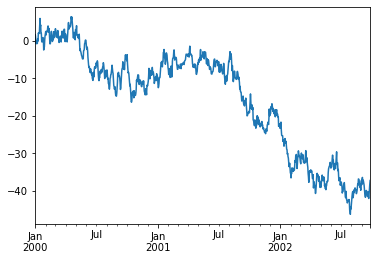

In [90]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

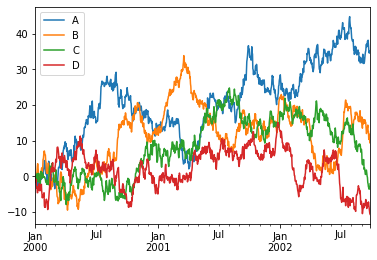

In [91]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')